**IMPORTING AND LOADING DATA**

In [1]:
import tensorflow as tf       #build model
import pandas as pd           #data manipulation and preprocessing
import numpy as np            #maths computations
import tensorflow_datasets as tfds   #dataset
import matplotlib.pyplot as plt

In [2]:
dataset ,dataset_info = tfds.load('malaria',with_info=True,shuffle_files=True,as_supervised=True,split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete9Q93E0/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [4]:
for data in dataset[0].take(4):
  print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(133, 127, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [5]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpnz7c3ha2tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [6]:
#Splitig basics
'''data = tf.data.Dataset.range(10)
print(list(data.as_numpy_iterator()))

data1 = data.skip(7)
print(list(data1.as_numpy_iterator()))

data2 = data.take(6)
print(list(data2.as_numpy_iterator()))'''

#splitting advance
'''TRAIN_RATIO = 0.6
VAL_RATIO =0.2
TEST_RATIO =0.2
DATASET_SIZE = len(data)

data = tf.data.Dataset.range(10)
print(list(data.as_numpy_iterator()))

train_dataset = data.take(int(TRAIN_RATIO*DATASET_SIZE))
print(list(train_dataset.as_numpy_iterator()))

val_dataset1 = data.skip(int(TRAIN_RATIO*DATASET_SIZE))
val_dataset = val_dataset1.take(int(VAL_RATIO*DATASET_SIZE))
print(list(val_dataset1.as_numpy_iterator()))

test_dataset = val_dataset1.skip(int(VAL_RATIO*DATASET_SIZE))
print(list(test_dataset.as_numpy_iterator()))'''

'TRAIN_RATIO = 0.6\nVAL_RATIO =0.2\nTEST_RATIO =0.2\nDATASET_SIZE = len(data)\n\ndata = tf.data.Dataset.range(10)\nprint(list(data.as_numpy_iterator()))\n\ntrain_dataset = data.take(int(TRAIN_RATIO*DATASET_SIZE))\nprint(list(train_dataset.as_numpy_iterator()))\n\nval_dataset1 = data.skip(int(TRAIN_RATIO*DATASET_SIZE))\nval_dataset = val_dataset1.take(int(VAL_RATIO*DATASET_SIZE))\nprint(list(val_dataset1.as_numpy_iterator()))\n\ntest_dataset = val_dataset1.skip(int(VAL_RATIO*DATASET_SIZE))\nprint(list(test_dataset.as_numpy_iterator()))'

**DATA TRAINING USING SPLIT AND TAKE**

In [7]:
#define function for splitting
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_dataset1 = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_dataset1.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset = val_dataset1.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_dataset,val_dataset,test_dataset


In [8]:
#calling function
TRAIN_RATIO = 0.8
VAL_RATIO =0.1
TEST_RATIO =0.1

train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)

print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),
      list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

**DATA VISUALIZATION**

<ipython-input-9-a79071b7371e>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5,5,i+1)


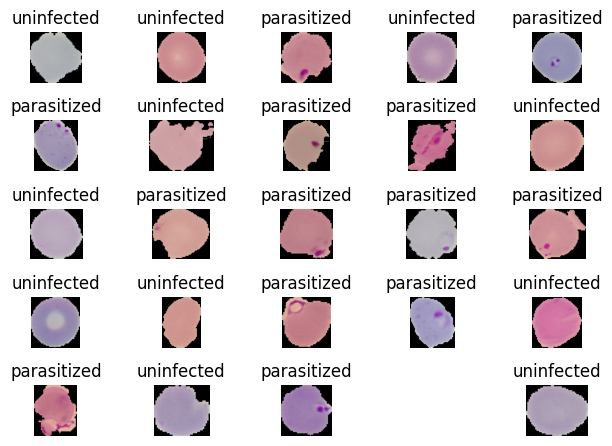

In [9]:
for i,(image,label) in enumerate(train_dataset.take(25)):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))        #from dateset_info
  plt.tight_layout()
  plt.axis('off')

**DATA PROCESSING** (Image resize ,rescale i.e normalization, increase performance)

In [10]:
#Resizing and rescaling
IM_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0, label          #255.0 is for normalizing pixels ranges from Xmin = 0 to Xmax = 255


In [11]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [12]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [13]:
#increasing data performance

train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

CNNs, or Convolutional Neural Networks, are preferred over normal deep learning models for tasks like recognising objects in pictures because they're really good at understanding images. They work a bit like how our brains do when we look at things - they learn to recognise different parts of images, like edges, shapes, or textures. This makes them great at spotting things in pictures, even if those things are in different places in each picture. Plus, they're efficient, meaning they don't waste time and energy on things that aren't important in the picture. So, for tasks involving images, like recognising animals or objects in photos, CNNs are the go-to choice because they're good at what they do and they do it quickly.


In [14]:
#CNN model preparation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization

lenet_model = Sequential([
                      InputLayer(input_shape = (IM_SIZE,IM_SIZE,3)),

                      Conv2D(filters = 6,kernel_size = 3,strides=(1, 1),padding='valid',activation='relu'),
                      BatchNormalization(),
                      MaxPool2D(pool_size=(2, 2),strides=2),

                      Conv2D(filters = 16,kernel_size =3,strides=(1, 1),padding='valid',activation='relu'),
                      BatchNormalization(),
                      MaxPool2D(pool_size=(2, 2),strides=2),

                      Flatten(),

                      Dense(100,activation ="relu"),
                      BatchNormalization(),

                      Dense(10 ,activation ="relu"),
                      BatchNormalization(),

                      Dense(1  ,activation ="sigmoid")
                   ])

lenet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

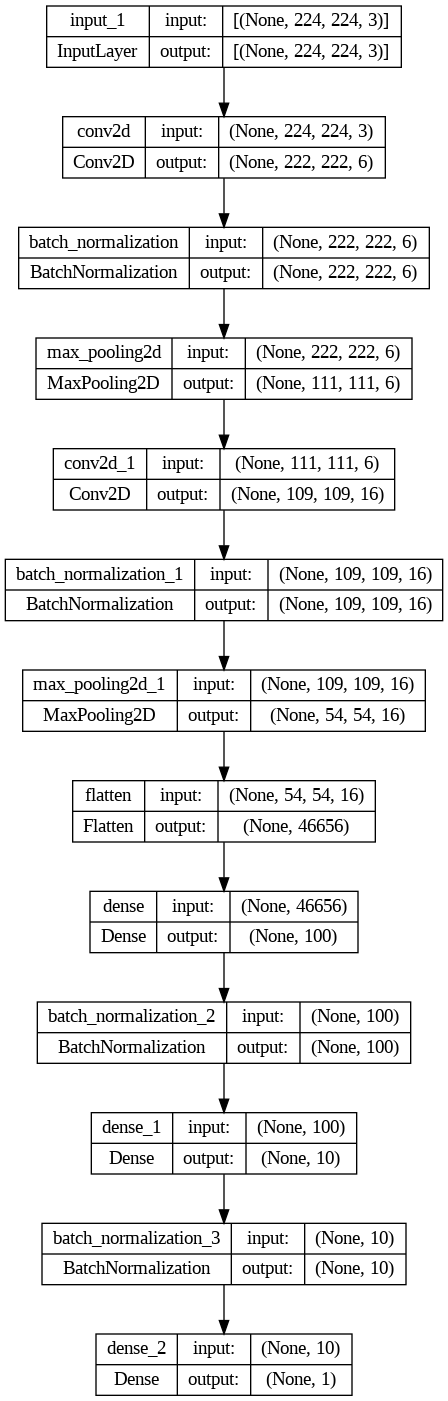

In [15]:
tf.keras.utils.plot_model(lenet_model,to_file="model.png",show_shapes=True)

In [16]:
#model compiling

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

lenet_model.compile (
                 optimizer = Adam(learning_rate = 0.01),
                 loss = BinaryCrossentropy(),
                 metrics = 'accuracy'
)

In [17]:
#training the model
history = lenet_model.fit(train_dataset,validation_data = val_dataset,epochs=20, verbose =1)

Epoch 1/20
689/689 [==============================] - 62s 74ms/step - loss: 0.4161 - accuracy: 0.8094 - val_loss: 1.3017 - val_accuracy: 0.4966
Epoch 2/20
689/689 [==============================] - 41s 60ms/step - loss: 0.2366 - accuracy: 0.9156 - val_loss: 0.4427 - val_accuracy: 0.7165
Epoch 3/20
689/689 [==============================] - 42s 60ms/step - loss: 0.1921 - accuracy: 0.9354 - val_loss: 0.2101 - val_accuracy: 0.9372
Epoch 4/20
689/689 [==============================] - 41s 60ms/step - loss: 0.1755 - accuracy: 0.9408 - val_loss: 0.3880 - val_accuracy: 0.9089
Epoch 5/20
689/689 [==============================] - 42s 61ms/step - loss: 0.1627 - accuracy: 0.9463 - val_loss: 0.4579 - val_accuracy: 0.6900
Epoch 6/20
689/689 [==============================] - 41s 60ms/step - loss: 0.1575 - accuracy: 0.9484 - val_loss: 0.7763 - val_accuracy: 0.5448
Epoch 7/20
689/689 [==============================] - 50s 73ms/step - loss: 0.1640 - accuracy: 0.9467 - val_loss: 0.5171 - val_accuracy:

In [18]:
print(history.history)

{'loss': [0.4160940647125244, 0.23656970262527466, 0.1920715570449829, 0.17552560567855835, 0.16265526413917542, 0.15752369165420532, 0.16397807002067566, 0.15749280154705048, 0.13853499293327332, 0.13348166644573212, 0.15281209349632263, 0.13585937023162842, 0.13123436272144318, 0.12936943769454956, 0.1135464757680893, 0.19901049137115479, 0.15019986033439636, 0.15039364993572235, 0.14271144568920135, 0.12056669592857361], 'accuracy': [0.8093985319137573, 0.9156309366226196, 0.9353623986244202, 0.9408056139945984, 0.94633948802948, 0.9483806490898132, 0.9467023611068726, 0.9475188255310059, 0.9542773962020874, 0.9575886726379395, 0.9475641846656799, 0.9547309875488281, 0.9565000534057617, 0.9564546942710876, 0.963122546672821, 0.928195595741272, 0.9477456212043762, 0.9491063952445984, 0.9526898264884949, 0.9590855240821838], 'val_loss': [1.3017350435256958, 0.44268977642059326, 0.21006783843040466, 0.3879587650299072, 0.4579292833805084, 0.7762894630432129, 0.5170525908470154, 0.21593

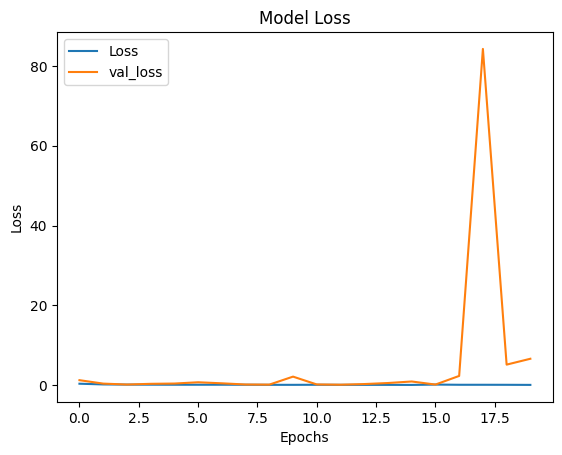

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','val_loss'])
plt.show()


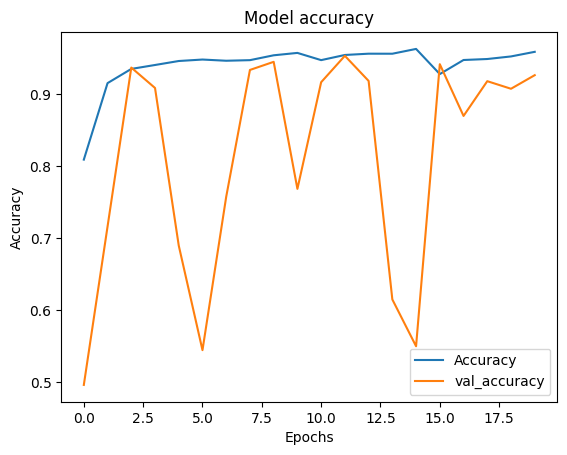

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','val_accuracy'])
plt.show()

**MODEL EVALUATION AND TESTING**

In [21]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [22]:
test_dataset = test_dataset.batch(1)

In [23]:
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 20s 3ms/step - loss: 6.5333 - accuracy: 0.9246


[6.533280372619629, 0.9245556592941284]

In [ ]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

In [ ]:
parasite_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 0s 29ms/step


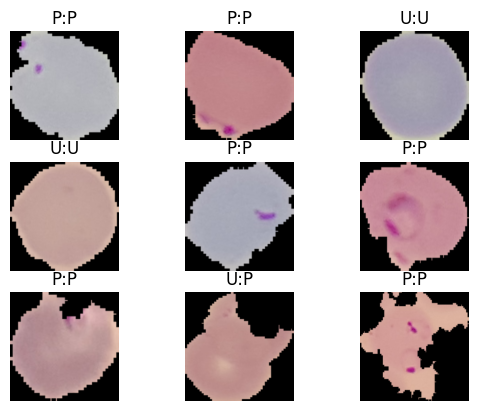

In [28]:
for i,(image,label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0])))

  plt.axis('off')

In [27]:
lenet_model.save('lenet_save_model')